# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [34]:
import numpy as np
import keras
from keras import layers
from keras.datasets import cifar10
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

## Prepare the data

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()


## Build the model

In [39]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0   

## Train the model

In [44]:
batch_size = 128
epochs = 15

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 498s 1s/step - loss: 1.5093 - accuracy: 0.4990 - val_loss: 3.3191 - val_accuracy: 0.1548
Epoch 2/15
352/352 [==============================] - 503s 1s/step - loss: 0.9097 - accuracy: 0.6773 - val_loss: 0.9062 - val_accuracy: 0.6796
Epoch 3/15
352/352 [==============================] - 505s 1s/step - loss: 0.7081 - accuracy: 0.7512 - val_loss: 0.7229 - val_accuracy: 0.7478
Epoch 4/15
352/352 [==============================] - 508s 1s/step - loss: 0.5792 - accuracy: 0.7976 - val_loss: 0.6987 - val_accuracy: 0.7630
Epoch 5/15
352/352 [==============================] - 503s 1s/step - loss: 0.4760 - accuracy: 0.8333 - val_loss: 0.6205 - val_accuracy: 0.7844
Epoch 6/15
352/352 [==============================] - 497s 1s/step - loss: 0.3919 - accuracy: 0.8618 - val_loss: 0.6166 - val_accuracy: 0.7994
Epoch 7/15
352/352 [==============================] - 496s 1s/step - loss: 0.3242 - accuracy: 0.8851 - val_loss: 0.6070 - val_accuracy: 0.8038

## Evaluate the trained model

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9371569156646729
Test accuracy: 0.7807999849319458


1/1 [==============================] - 0s 14ms/step
Original label is cat and predicted label is cat


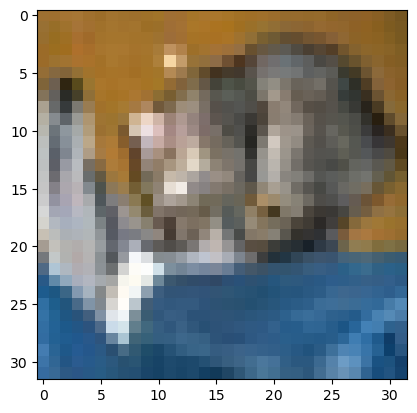

In [51]:
# label mapping
 
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 0
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))
